In [85]:
# pip install ipython
# pip install pillow
# pip install TA_Lib-0.4.19-cp38-cp38-win_amd64.whl
# pip install xgboost
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt

from IPython.display import Image

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from PIL import Image as Image2

import tushare as ts
import datetime
from datetime import datetime as dtime
import mpl_finance as mpf
import seaborn as sns
from matplotlib.pylab import date2num
import talib

from xgboost import XGBClassifier
from xgboost import XGBRegressor

In [3]:
'''
解决非数值类型的文本数据、重复值、缺失值、异常值及数据分布不均衡等问题。
feature engineering
'''

'\n解决非数值类型的文本数据、重复值、缺失值、异常值及数据分布不均衡等问题。\nfeature engineering\n'

In [13]:
'''
01. 非数值类型数据处理
'''

# (a) get_dummies() 某feature中的分类类别变成features本身

test01_df = pd.DataFrame({'客户编号': [1, 2, 3], '性别': ['男', '女', '男']})
test01_df

,客户编号,性别
0,1,男
1,2,女
2,3,男


In [14]:
dummies_df = pd.get_dummies(test01_df, columns=['性别'])
dummies_df

,客户编号,性别_女,性别_男
0,1,0,1
1,2,1,0
2,3,0,1


In [15]:
dummies_df = dummies_df.drop(columns='性别_女')
dummies_df

,客户编号,性别_男
0,1,1
1,2,0
2,3,1


In [16]:
dummies_df = dummies_df.rename(columns={'性别_男':'性别'})
dummies_df

,客户编号,性别
0,1,1
1,2,0
2,3,1


In [23]:
# (b) LabelEncoder()编号处理

test02_df = pd.DataFrame({'编号': [1, 2, 3, 4, 5],\
                   '城市': ['北京', '上海', '广州', '深圳', '北京']})
test02_df

,编号,城市
0,1,北京
1,2,上海
2,3,广州
3,4,深圳
4,5,北京


In [24]:
label = LabelEncoder().fit_transform(df['城市'])
print(label)

[1 0 2 3 1]


In [25]:
test02_df['城市'] = label
test02_df

,编号,城市
0,1,1
1,2,0
2,3,2
3,4,3
4,5,1


In [26]:
# (c) replace()

test03_df = pd.DataFrame({'编号': [1, 2, 3, 4, 5],\
                          '城市': ['北京', '上海', '广州', '深圳', '北京']})
test03_df

,编号,城市
0,1,北京
1,2,上海
2,3,广州
3,4,深圳
4,5,北京


In [27]:
test03_df['城市'].value_counts()

北京    2
上海    1
广州    1
深圳    1
Name: 城市, dtype: int64

In [28]:
test03_df['城市'] = test03_df['城市']\
.replace({'北京': 0, '上海': 1, '广州': 2, '深圳':3})
test03_df

,编号,城市
0,1,0
1,2,1
2,3,2
3,4,3
4,5,0


In [49]:
'''
重复值处理
'''

# (a) 重复行处理

test04_data = pd.DataFrame([[1, 2, 3], [1, 2, 3], [4, 5, 6]],\
                    columns=['c1', 'c2', 'c3'])
test04_data

,c1,c2,c3
0,1,2,3
1,1,2,3
2,4,5,6


In [50]:
test04_data[test04_data.duplicated()]

,c1,c2,c3
1,1,2,3


In [51]:
test04_data.duplicated().sum() # 统计有多少重复行

1

In [52]:
new_data = test04_data
new_data = new_data.drop_duplicates()
new_data

,c1,c2,c3
0,1,2,3
2,4,5,6


In [53]:
# (b) 注意: 上面是按行去重，若要按列去重，如 c1 列出现了两个 1，就要删除其中某行

test04_data

,c1,c2,c3
0,1,2,3
1,1,2,3
2,4,5,6


In [54]:
test04_data = test04_data.drop_duplicates('c1')
test04_data

,c1,c2,c3
0,1,2,3
2,4,5,6


In [56]:
'''
缺失值处理
'''

test05_data = pd.DataFrame([[1, np.nan, 3], [np.nan, 2, np.nan],\
                            [1, np.nan, 0]], columns=['c1', 'c2', 'c3'])
test05_data

,c1,c2,c3
0,1.0,NaN,3.0
1,NaN,2.0,NaN
2,1.0,NaN,0.0


In [86]:
# isnull() or isna()

test05_data.isnull()  # 或者写data.isna()

,c1,c2,c3
0,False,True,False
1,True,False,True
2,False,True,False


In [87]:
# 也可以对单列查看缺失值情况，代码如下：
test05_data['c1'].isnull()

0    False
1     True
2    False
Name: c1, dtype: bool

In [88]:
# (a1) 删除空值所在行

a = test05_data
a = a.dropna()
a

,c1,c2,c3


In [89]:
# (a2) 有选择性地删除控制所在行

b = test05_data
b = b.dropna(thresh=2) #去掉存在两个NaN的行
b

,c1,c2,c3
0,1.0,NaN,3.0
2,1.0,NaN,0.0


In [90]:
# (b) fillna()函数以列均值填补空值

c = test05_data
c = c.fillna(c.mean())
c

,c1,c2,c3
0,1.0,2.0,3.0
1,1.0,2.0,1.5
2,1.0,2.0,0.0


In [91]:
# (c1) method='pad' 用缺失值所在列的前一个值填充，若前值也缺失不存在，则结果不变。

d = test05_data
d = d.fillna(method='pad')
d

,c1,c2,c3
0,1.0,NaN,3.0
1,1.0,2.0,3.0
2,1.0,2.0,0.0


In [92]:
# (c2) method='backfill' or 'bfill', 用缺失值所在列的后一个值填充

e = test05_data
e = e.fillna(method='bfill')
e

,c1,c2,c3
0,1.0,2.0,3.0
1,1.0,2.0,0.0
2,1.0,NaN,0.0


In [93]:
'''
异常值(数据异常大或小)处理
'''

test06_data = pd.DataFrame({'c1': [3, 10, 5, 7, 1, 9, 69],\
                            'c2': [15, 16, 14, 100, 19, 11, 8],\
                            'c3': [20, 15, 18, 21, 120, 27, 29]},\
                           columns=['c1', 'c2', 'c3'])
test06_data

,c1,c2,c3
0,3,15,20
1,10,16,15
2,5,14,18
3,7,100,21
4,1,19,120
5,9,11,27
6,69,8,29


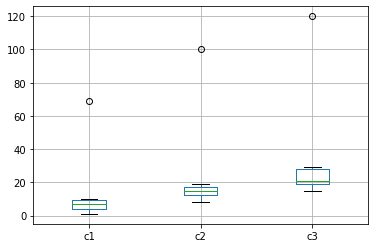

In [101]:
# (a) 画箱型图并利用其观察异常点

test06_data.boxplot()

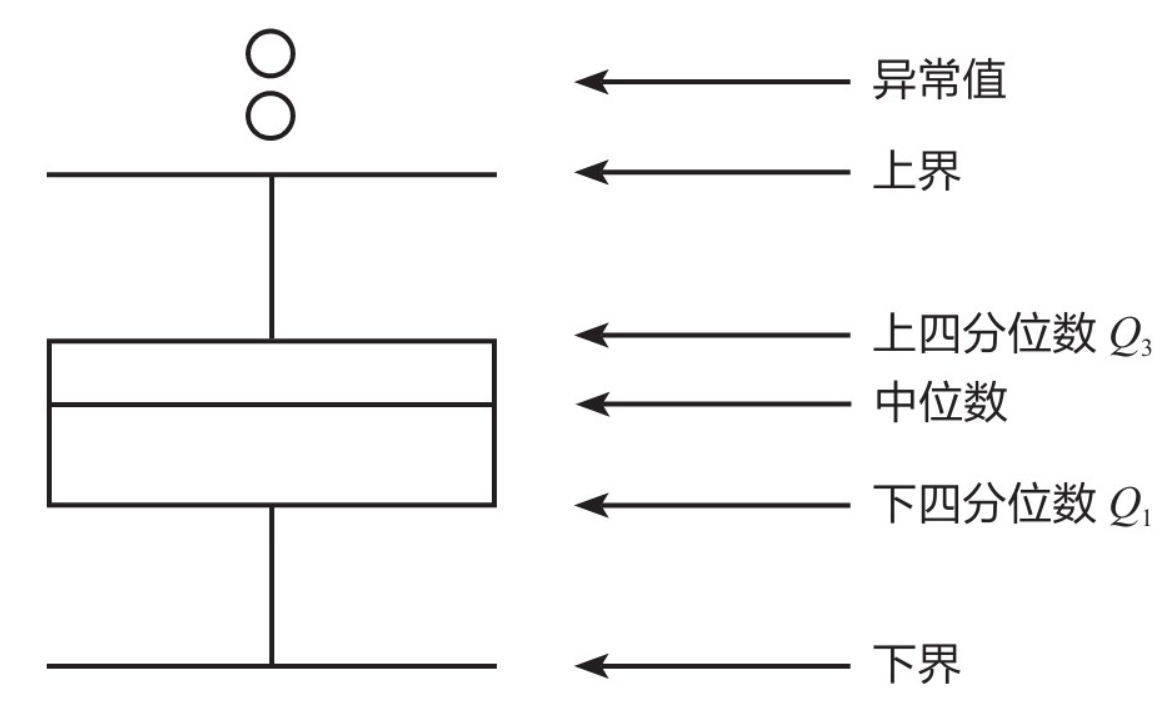

In [103]:
Image(filename = "feature_egr.png", width = 500, height = 500)

In [104]:
# (b) 用标准差查看异常点

std = pd.DataFrame()
for i in test06_data.columns:
    z = (test06_data[i] - test06_data[i].mean()) / test06_data[i].std()
    std[i] = abs(z) > 2

std

,c1,c2,c3
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,True
5,False,False,False
6,True,False,False


In [105]:
'''
数据标准化
'''

X = pd.DataFrame({'酒精含量(%)': [50, 60, 40, 80, 90],\
                  '苹果酸含量(%)': [2, 1, 1, 3, 2]})
y = [0, 0, 0, 1, 1]

X

,酒精含量(%),苹果酸含量(%)
0,50,2
1,60,1
2,40,1
3,80,3
4,90,2


In [106]:
# (a) MinMax标准化

X_normal = MinMaxScaler().fit_transform(X)
print(X_normal)  # 查看 normalized X, 标准化之后再train_test_split

[[0.2 0.5]
 [0.4 0. ]
 [0.  0. ]
 [0.8 1. ]
 [1.  0.5]]


In [107]:
# (b) Z_score标准化

X_normal2 = StandardScaler().fit_transform(X)
print(X_normal2)

[[-0.75482941  0.26726124]
 [-0.21566555 -1.06904497]
 [-1.29399328 -1.06904497]
 [ 0.86266219  1.60356745]
 [ 1.40182605  0.26726124]]


In [108]:
'''
数据分箱
'''

box = pd.DataFrame([[22,1],[25,1],[20,0],[35,0],[32,1],\
                    [38,0],[50,0],[46,1]], columns=['年龄', '是否违约'])
box

,年龄,是否违约
0,22,1
1,25,1
2,20,0
3,35,0
4,32,1
5,38,0
6,50,0
7,46,1


In [112]:
# (a) 等宽分箱 --- 将连续值等宽分段后放入不同的箱内 0~100 -> [0~20), [20,40),...,[80,100)

# (b) 等深分箱 --- 使得每个离散箱内的样本个数相同 (所以划分跨度很可能不同)

data_cut = pd.cut(box['年龄'], 3) #等宽分到 3个箱子内
print(data_cut)

0    (19.97, 30.0]
1    (19.97, 30.0]
2    (19.97, 30.0]
3     (30.0, 40.0]
4     (30.0, 40.0]
5     (30.0, 40.0]
6     (40.0, 50.0]
7     (40.0, 50.0]
Name: 年龄, dtype: category
Categories (3, interval[float64]): [(19.97, 30.0] < (30.0, 40.0] < (40.0, 50.0]]


In [113]:
# 补充知识点，分箱并进行编号
print(pd.cut(box['年龄'], 3, labels=[1, 2, 3]))

0    1
1    1
2    1
3    2
4    2
5    2
6    3
7    3
Name: 年龄, dtype: category
Categories (3, int64): [1 < 2 < 3]


In [114]:
box['年龄'].groupby(data_cut).count() #查看每个箱子内的样本数

年龄
(19.97, 30.0]    3
(30.0, 40.0]     3
(40.0, 50.0]     2
Name: 年龄, dtype: int64